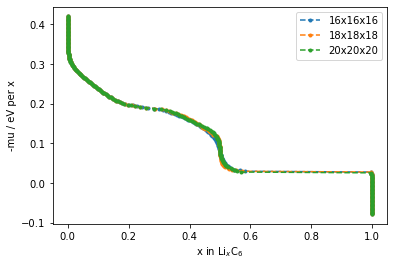

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#df0=pd.read_csv('abs_mu_-1,0_1,0_0,005.out',names=['T','mu','E-mu*x','x','phi','E2','x2','Elte-mu*x_lte','x_lte','phi_lte','E_mf-mu*x_mf','x_mf','phi_mf','E_hte-me*x_hte','x_hte','phi_hte','lro','corr'],usecols=[1,3],sep='\t')

def read_file(index):
    df = pd.read_csv('abs_-0,3_0,2_er%d.out' % index,names=['mu','x','varE','varx'],usecols=[1,3,5,6],sep='\t')
    return(df)

#df1=pd.read_csv('mu-1,0_er13_gs1.out',names=['T','mu','E-mu*x','x','phi','E2','x2','Elte-mu*x_lte','x_lte','phi_lte','E_mf-mu*x_mf','x_mf','phi_mf','E_hte-me*x_hte','x_hte','phi_hte','lro','corr'],sep='\t')
#df2=pd.read_csv('mu-1,0_er13_gs2.out',names=['T','mu','E-mu*x','x','phi','E2','x2','Elte-mu*x_lte','x_lte','phi_lte','E_mf-mu*x_mf','x_mf','phi_mf','E_hte-me*x_hte','x_hte','phi_hte','lro','corr'],sep='\t')
# print(df0['x'].iloc[0:5])

# all_labels = [13,15,17,19,21,23,25,27,29,31,33,36]
# all_labels = [21,23,25,27,29,31,33,36]
all_labels = [29,31,33,36]
all_dfs = [read_file(index) for index in all_labels]
odd_labels = []
even_labels = []
label_dict = {}
df_dict = {label : df for label,df in zip(all_labels,all_dfs)}

for n,label in enumerate(all_labels):
    if label < 36:
        size = (label+3) / 2
    else:
        size = (label+4) / 2
    if size % 2 == 0:
        even_labels.append(label)
    else:
        odd_labels.append(label)
    label_dict[label] = size
    

for label,df in df_dict.items():
    df['x_real'] = 0.5*df['x'] + 0.5
    df['mu_realx'] = df['mu'] - 0.12
    size = str(int(label_dict[label]))
    if label in even_labels:
        plt.plot(df['x_real'],-df['mu_realx'],linestyle='--',marker='o',label=size+'x'+size+'x'+size,markersize=3)

plt.xlabel('x in Li$_{x}$C$_{6}$')
plt.ylabel('-mu / eV per x')
plt.legend()
plt.show()
